<a href="https://colab.research.google.com/github/WhiskeyMaDawg/SC1015_DataScience_Project/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KMeans Clustering**

**(Note: Data Cleaning and EDA were included for reference. KMeans Clustering was done after those sections)**


## **Import Data**
Import Data, rename columns and rearrange the columns

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from google.colab import files
import io
sb.set() # set the default Seaborn style for graphics

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
songdf = pd.read_csv('gdrive/My Drive/SC1015 Project/SpotifyFinalAPI.csv') # this address different from everyone, check where you save the dataset and change the address accordingly, alternatively, can just save the dataset in 'My Drive'
songdf.head()

Mounted at /content/gdrive


,track_id,track_name_x,popularity,track_uri,artist_name,artist_popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [ ]:
# no duplicate to be removed

In [ ]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 18)
track_id              object
track_name_x          object
popularity             int64
track_uri             object
artist_name           object
artist_popularity      int64
artist_genres         object
album                 object
track_name_y          object
danceability         float64
energy               float64
tempo                float64
loudness             float64
valence              float64
speechiness          float64
instrumentalness     float64
liveness             float64
acousticness         float64
dtype: object


In [ ]:
#remove irrelevant columns
songdf = songdf.drop(columns = ["track_uri", "track_name_y"],axis = 1)
songdf.head()


,track_id,track_name_x,popularity,artist_name,artist_popularity,artist_genres,album,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [ ]:
# check is there any null values, and there are 4 null values in the track name and artist
songdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           791 non-null    object 
 1   track_name_x       791 non-null    object 
 2   popularity         791 non-null    int64  
 3   artist_name        791 non-null    object 
 4   artist_popularity  791 non-null    int64  
 5   artist_genres      791 non-null    object 
 6   album              791 non-null    object 
 7   danceability       791 non-null    float64
 8   energy             791 non-null    float64
 9   tempo              791 non-null    float64
 10  loudness           791 non-null    float64
 11  valence            791 non-null    float64
 12  speechiness        791 non-null    float64
 13  instrumentalness   791 non-null    float64
 14  liveness           791 non-null    float64
 15  acousticness       791 non-null    float64
dtypes: float64(9), int64(2), o

Good, there is no NULL values for all the variables, so we did not have to change any NULL value data

In [ ]:
#shift popularity to the back for better viewing
tp = songdf.pop("popularity")
songdf["popularity"] = tp
songdf.head(5)

,track_id,track_name_x,artist_name,artist_popularity,artist_genres,album,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


In [ ]:
# Renaming the column names
songdf = songdf.rename(columns={"track_name_x":"title", "artist_name": "artist"})
songdf.head()

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


## **Distinguish Categorical variables from Numeric Variables**
In the data set, some categorical variables like speechiness and instrumentalness are encoded as numbers, and should not be interpreted as numerical variables. 

In [ ]:
# convert the speechiness column into categorical
speechiness_cat = pd.cut(songdf.speechiness,bins=[0,0.33,0.66,1.0],labels=['Words','Mix','Music'])
songdf.insert(8,'speech', speechiness_cat)    
songdf.head()

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speech,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100,90


In [ ]:
songdf.drop(columns=["speechiness"], axis=1, inplace=True)

In [ ]:
# rename the speech column to speechiness again
songdf = songdf.rename(columns={"speech":"speechiness"})
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,valence,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,0.931,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,0.334,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,0.541,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,0.129,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,0.446,0.000000,0.1050,0.75100,90


**Instrumentalness:** 
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0

In [ ]:
bins =[-np.inf,0.5,1]
instrumentalness_cat = pd.cut(songdf.instrumentalness,bins,labels=['Vocal', 'No Vocals'])
songdf.insert(11,'instrumental', instrumentalness_cat)
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,instrumentalness,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,0.000000,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,0.000095,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,0.000161,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,0.000070,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,0.000000,0.1050,0.75100,90


In [ ]:
songdf.drop(columns=["instrumentalness"], axis=1, inplace=True)
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,0.1050,0.75100,90


**liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

In [ ]:
bins =[-np.inf,0.8,1]
live_performance = pd.cut(songdf.liveness,bins,labels=['No', 'Yes'])
songdf.insert(13,'live_performance', live_performance)
songdf.head(5)

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,liveness,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.0931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.0897,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.1700,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.1310,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.1050,0.75100,90


In [ ]:
songdf.drop(columns=["liveness"], axis=1, inplace=True)

In [ ]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 16)
track_id               object
title                  object
artist                 object
artist_popularity       int64
artist_genres          object
album                  object
danceability          float64
energy                float64
speechiness          category
tempo                 float64
loudness              float64
instrumental         category
valence               float64
live_performance     category
acousticness          float64
popularity              int64
dtype: object


This is the end for our data cleaning, since we extracted the data ourselves from the Spotify API, we only extract what is relevant to us, thus there is not much data cleaing we have to do. 

## **Copy of original dataframe**

In [ ]:
# Create a duplicate back up dataframe just in case the original dataframe mess up
song2df = songdf
song2df.head()

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.75100,90


In [ ]:
print("Data dimensions : ", song2df.shape)
print(song2df.dtypes)


Data dimensions :  (791, 16)
track_id               object
title                  object
artist                 object
artist_popularity       int64
artist_genres          object
album                  object
danceability          float64
energy                float64
speechiness          category
tempo                 float64
loudness              float64
instrumental         category
valence               float64
live_performance     category
acousticness          float64
popularity              int64
dtype: object


# **Data Analysis**
Removing outliers using the `IQR method`

## **Numerical Data Analysis**

### Create a new data frame to process numerical data

In [ ]:
songNumData = pd.DataFrame(songdf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo', 'popularity']])
songNumData

,danceability,energy,loudness,acousticness,valence,tempo,popularity
0,0.825,0.652,-3.183,0.58100,0.931,95.977,89
1,0.514,0.730,-5.934,0.00146,0.334,171.005,95
2,0.826,0.593,-6.401,0.68800,0.541,98.083,68
3,0.585,0.520,-6.136,0.12400,0.129,159.801,88
4,0.501,0.405,-5.679,0.75100,0.446,109.891,90
...,...,...,...,...,...,...,...
786,0.790,0.647,-5.983,0.05150,0.654,87.999,87
787,0.851,0.551,-5.177,0.15100,0.807,131.922,76
788,0.359,0.543,-7.582,0.49200,0.453,68.534,87
789,0.471,0.924,-3.906,0.00301,0.725,154.961,85


### Check out summary statistics

In [ ]:
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,97.000000


### Check out distributions: Boxplot, Histogram, Violin plot of numerical data

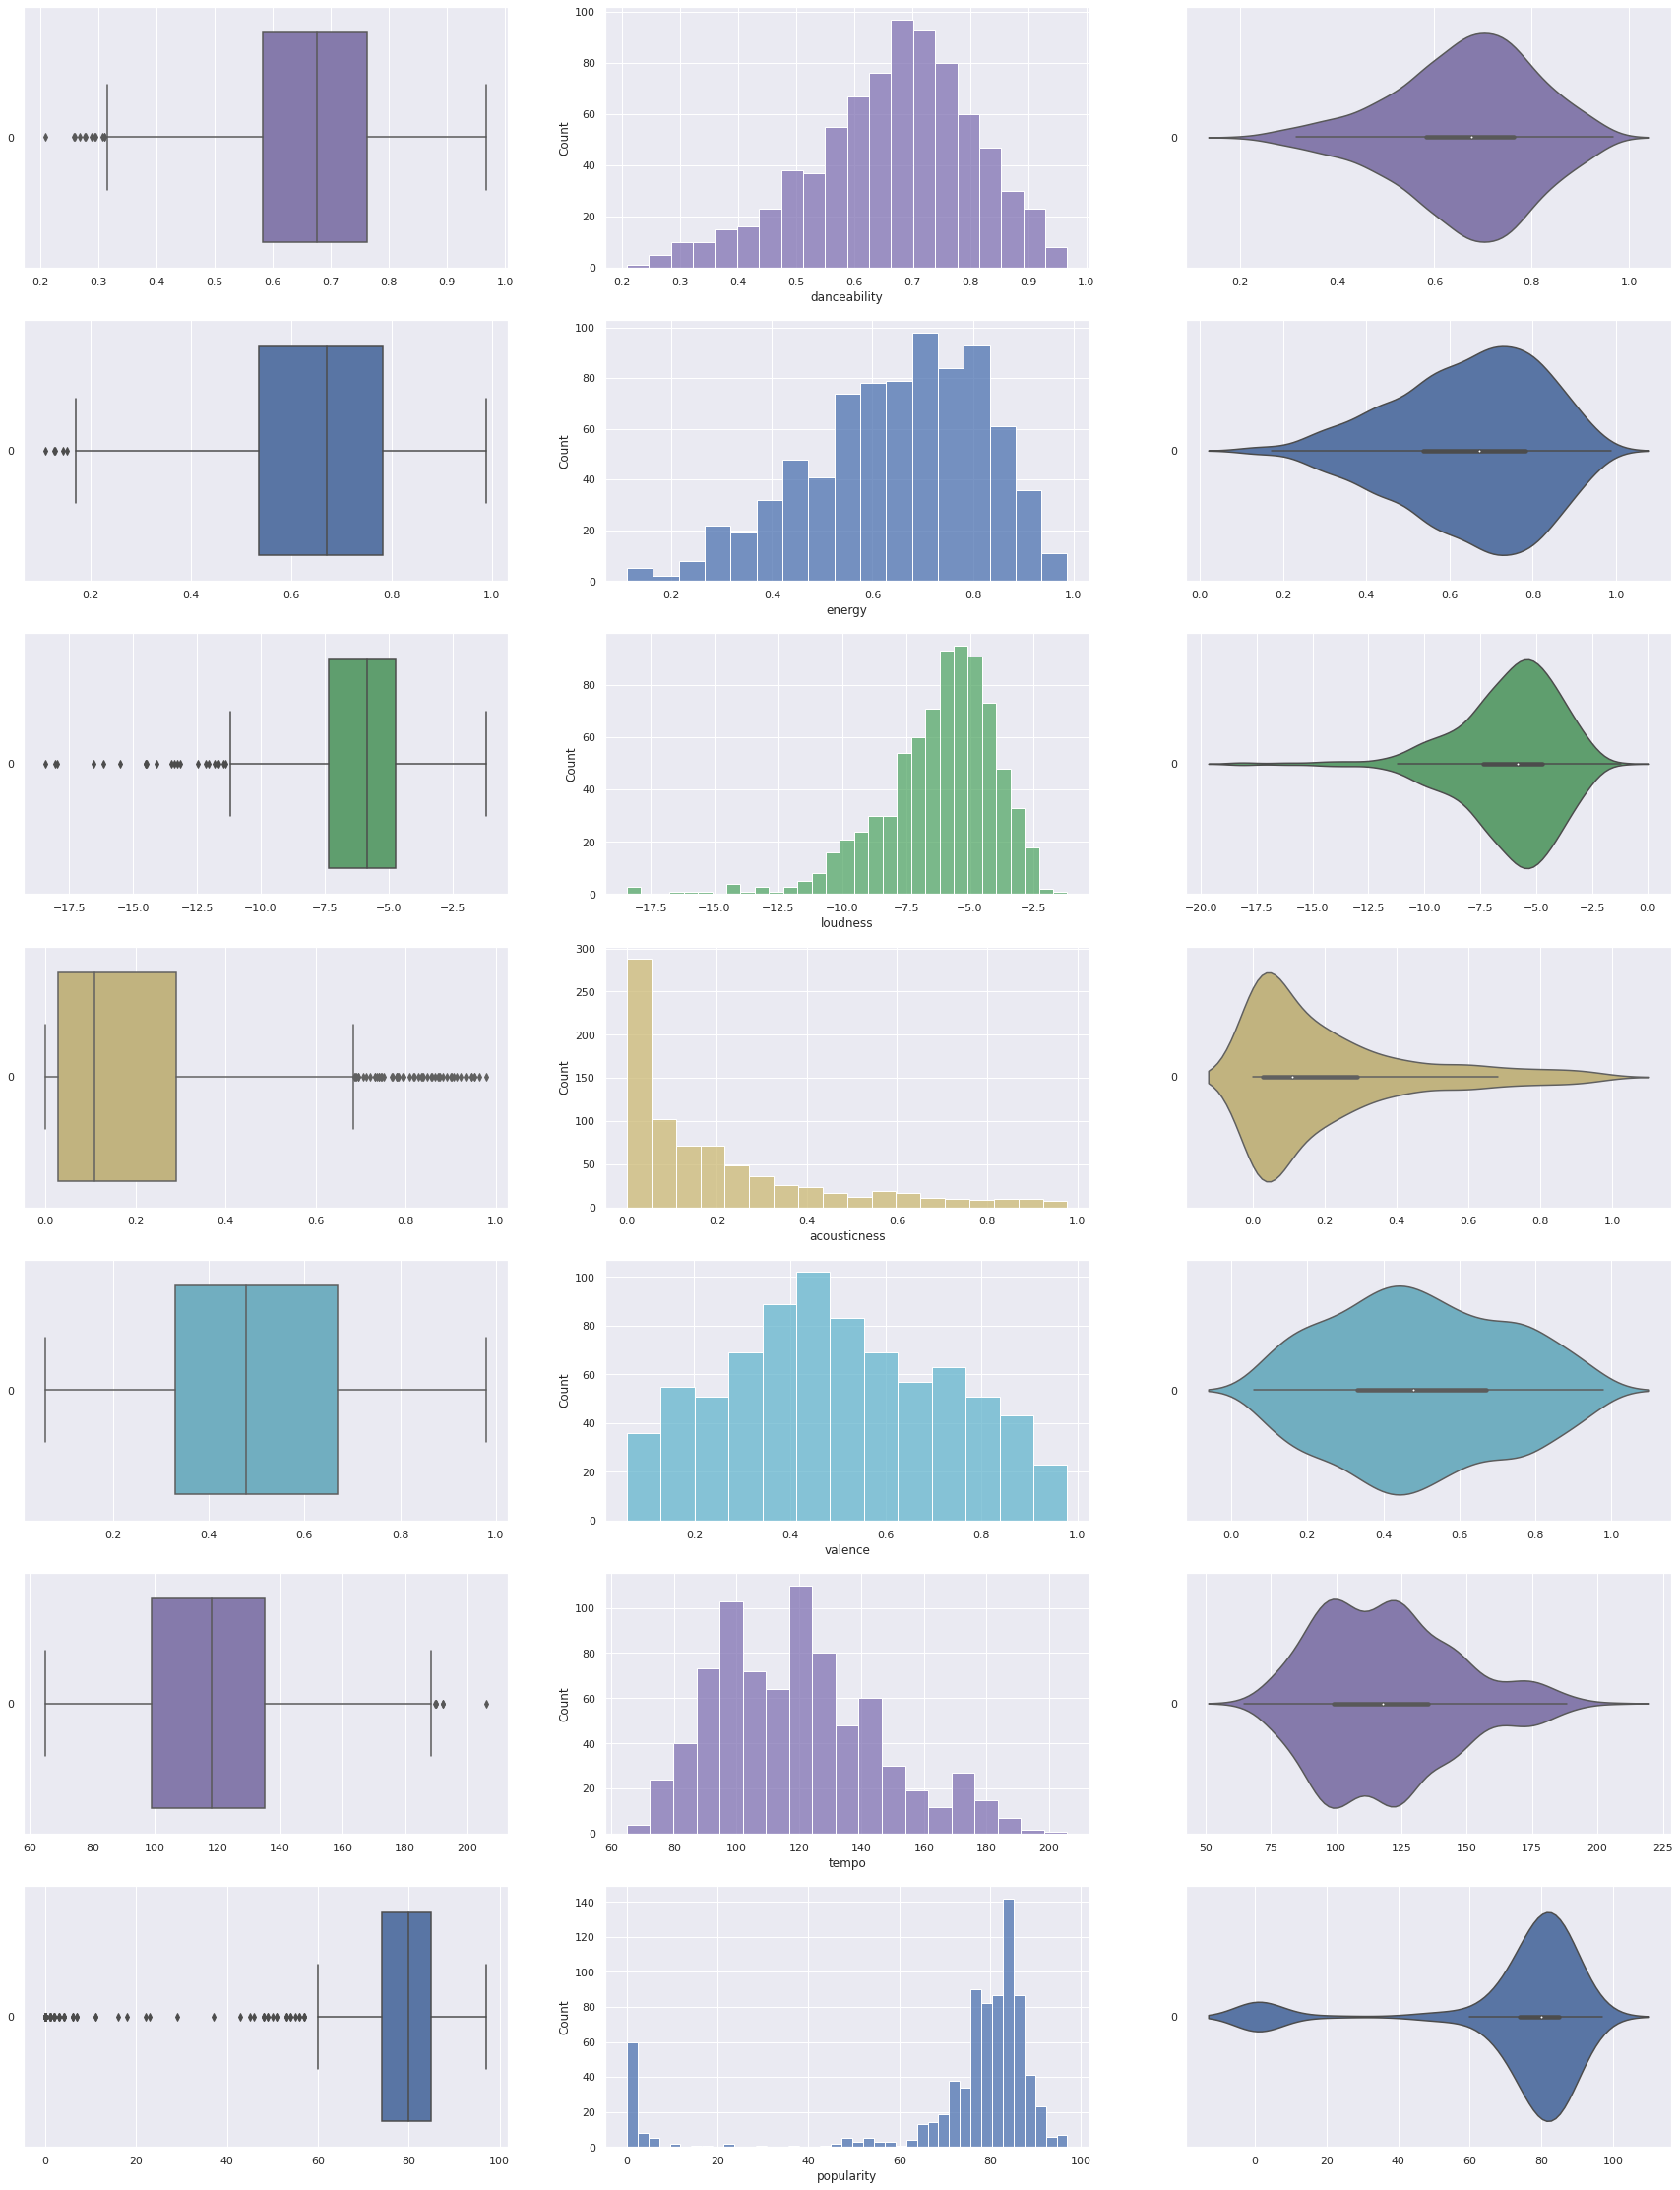

In [ ]:
f, axes = plt.subplots(7, 3, figsize=(30, 40))
colours = ['m', 'b', 'g', 'y','c','m','b','r']

count = 0
for var in songNumData:
    sb.boxplot(data = songNumData[var], orient = "h", ax = axes[count,0], color=colours[count])
    sb.histplot(data = songNumData[var], ax = axes[count,1], color=colours[count])
    sb.violinplot(data = songNumData[var], orient = "h", ax = axes[count,2], color=colours[count])
    count += 1

We see that there is an abnormally large amount of data in the "Popularity" as 0, which it should not be the case since we extracted the music data from "Spotify's Most Played All-Time" playlist. This means that all the songs should be quite popular, instead of having a 0 popularity. Thus, we decided to remove the outliers so that the data would be more accurate.

### Remove Outliers: Popularity

 The distribution of values in the sample of popularity seems Gaussian-like, so we used the standard deviation of the sample as a cut-off for identifying outliers.

In [ ]:
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,97.000000


In [ ]:
#Calculate Mean and IQR
mean_popularity = songNumData['popularity'].mean()
Q1 = songNumData['popularity'].quantile(0.25)
Q3 = songNumData['popularity'].quantile(0.75)
IQR = Q3 - Q1
print("Mean: ", mean_popularity)
print("IQR: ", IQR)

#Calculate outliers (if data<(Q1-1.5*IQR) or data>(Q3+1.5*IQR))
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print("Upper bound: ", upper)
print("Lower bound:", lower)

Mean:  72.09102402022756
IQR:  11.0
Upper bound:  101.5
Lower bound: 57.5


#### Remove outliers according to the upper and lower bound

In [ ]:
# Rule to identify outliers
rule = ((songNumData['popularity'] < lower) | (songNumData['popularity']  >  upper))

# Count the number of outliers
print("Number of outliers in popularity:")
rule.sum()

Number of outliers in popularity:


103

In [ ]:
# Indices or rows corresponding to outleirs
outlierindices = rule.index[rule == True]
outlierindices

Int64Index([  5,   6,   9,  15,  27,  39,  43,  45,  48,  51,
            ...
            475, 482, 544, 551, 567, 602, 609, 610, 678, 775],
           dtype='int64', length=103)

In [ ]:
# Remove the outliers based on the row indices obtained above
songdf.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
songdf

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.75100,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,4EWCNWgDS8707fNSZ1oaA5,Heartless,Kanye West,96,"['chicago rap', 'rap']",808s & Heartbreak,0.790,0.647,Words,87.999,-5.983,Vocal,0.654,No,0.05150,87
787,67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),The Proclaimers,65,"['celtic rock', 'scottish rock']",Sunshine on Leith,0.851,0.551,Words,131.922,-5.177,Vocal,0.807,No,0.15100,76
788,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,98,['pop'],Lover,0.359,0.543,Words,68.534,-7.582,Vocal,0.453,No,0.49200,87
789,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,Neon Trees,71,"['modern alternative rock', 'modern rock', 'po...",Picture Show,0.471,0.924,Words,154.961,-3.906,Vocal,0.725,No,0.00301,85


In [ ]:
# Reindex the column since some rows are missing
songdf = songdf.reset_index(drop=True)
songdf

,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.75100,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,4EWCNWgDS8707fNSZ1oaA5,Heartless,Kanye West,96,"['chicago rap', 'rap']",808s & Heartbreak,0.790,0.647,Words,87.999,-5.983,Vocal,0.654,No,0.05150,87
684,67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),The Proclaimers,65,"['celtic rock', 'scottish rock']",Sunshine on Leith,0.851,0.551,Words,131.922,-5.177,Vocal,0.807,No,0.15100,76
685,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,98,['pop'],Lover,0.359,0.543,Words,68.534,-7.582,Vocal,0.453,No,0.49200,87
686,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,Neon Trees,71,"['modern alternative rock', 'modern rock', 'po...",Picture Show,0.471,0.924,Words,154.961,-3.906,Vocal,0.725,No,0.00301,85


### Visualise plot after removing outliers


#### Boxplot, Histogram and Violin Plot

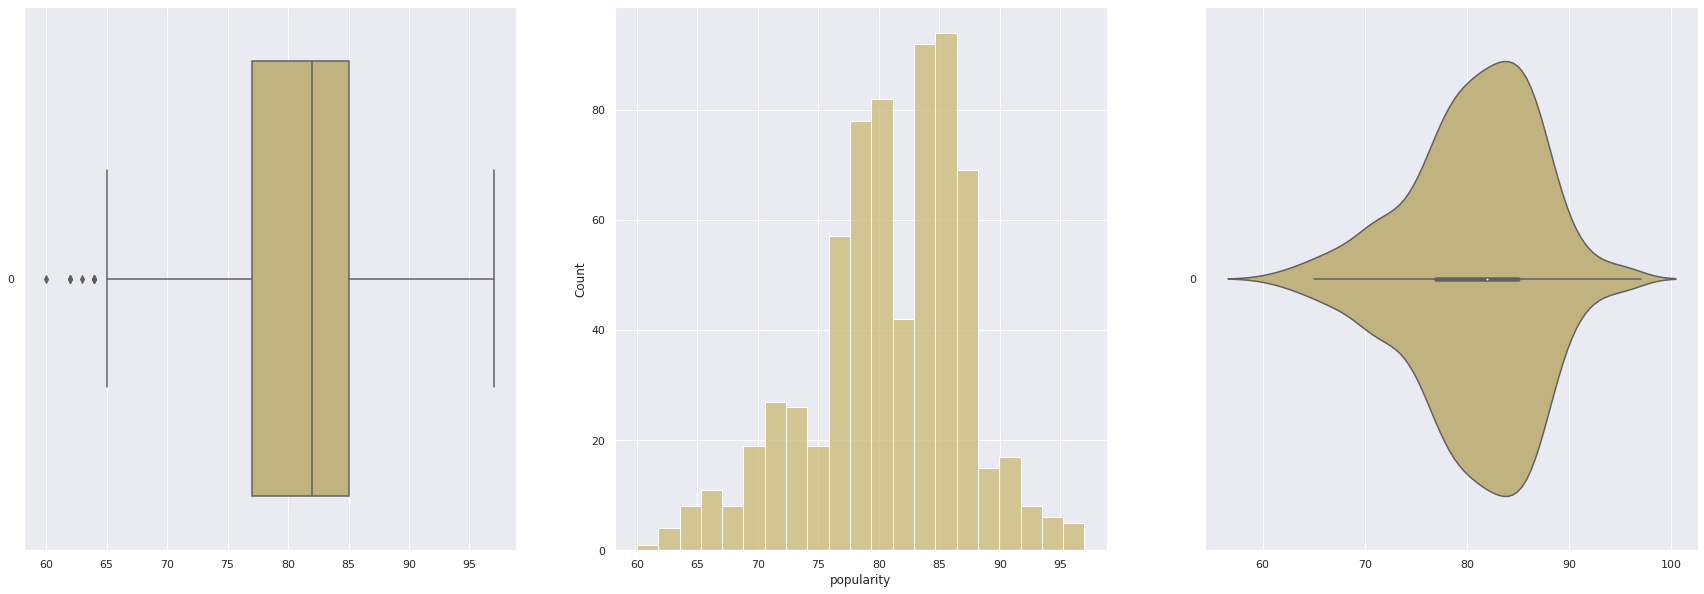

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(30, 10))
songNumData = pd.DataFrame(songdf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist_popularity','popularity']])
sb.boxplot(data = songdf['popularity'], orient = "h", ax = axes[0], color='y')
sb.histplot(data = songdf['popularity'], ax = axes[1], color='y')
sb.violinplot(data = songdf['popularity'], orient = "h", ax = axes[2], color='y')

#**KMeans Clustering** 

In [ ]:
songdf


,track_id,title,artist,artist_popularity,artist_genres,album,danceability,energy,speechiness,tempo,loudness,instrumental,valence,live_performance,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),0.825,0.652,Words,95.977,-3.183,Vocal,0.931,No,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,0.514,0.730,Words,171.005,-5.934,Vocal,0.334,No,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,0.826,0.593,Words,98.083,-6.401,Vocal,0.541,No,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,0.585,0.520,Words,159.801,-6.136,Vocal,0.129,No,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,0.501,0.405,Words,109.891,-5.679,Vocal,0.446,No,0.75100,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,4EWCNWgDS8707fNSZ1oaA5,Heartless,Kanye West,96,"['chicago rap', 'rap']",808s & Heartbreak,0.790,0.647,Words,87.999,-5.983,Vocal,0.654,No,0.05150,87
684,67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),The Proclaimers,65,"['celtic rock', 'scottish rock']",Sunshine on Leith,0.851,0.551,Words,131.922,-5.177,Vocal,0.807,No,0.15100,76
685,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,98,['pop'],Lover,0.359,0.543,Words,68.534,-7.582,Vocal,0.453,No,0.49200,87
686,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,Neon Trees,71,"['modern alternative rock', 'modern rock', 'po...",Picture Show,0.471,0.924,Words,154.961,-3.906,Vocal,0.725,No,0.00301,85


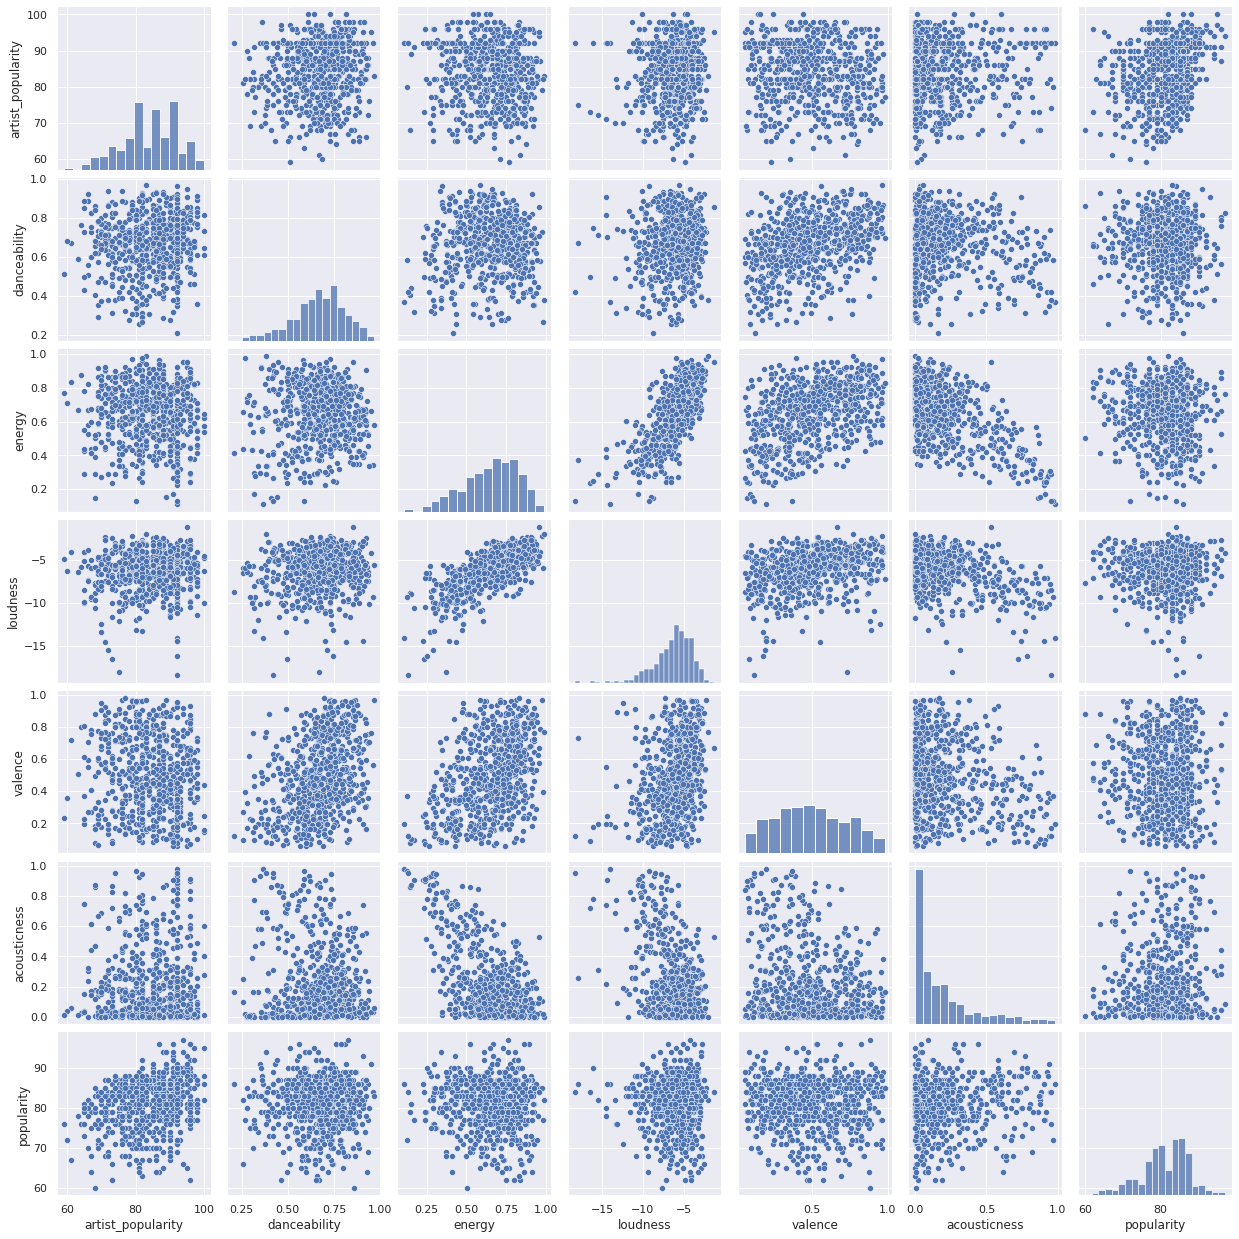

In [ ]:
# Extract the numeric variables
X = pd.DataFrame(songdf[["artist_popularity", "danceability", "energy", "loudness", "valence", "acousticness","popularity"]]) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

## **Determin clusters to reduce within sum of squares**
###Using Kmeans clustering, we run clusters from `1 to 40` to determine the number of clusters to get the `elbow plot`. From the elbow plot, we can determine the `optimal number of clusters` that can `best reduce` the within sum of squares value

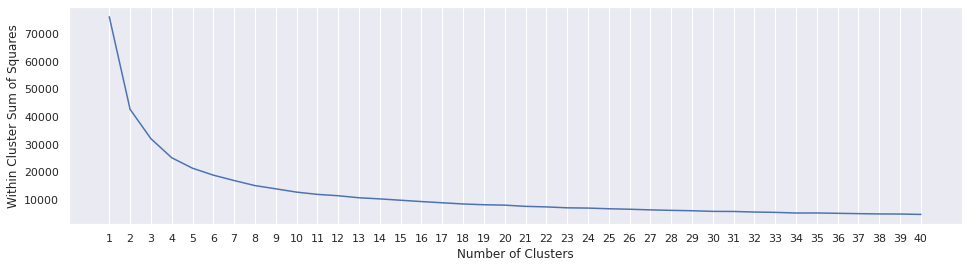

In [ ]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)  #n_init=5 runs the algorithm 5 times and puts a data into the cluster it appears most in out of the 5 times it was run
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### From the plot, it seems that at `cluster=5`, the within sum of squares values reduced steeply, and the Kmeans clustering with 5 clusters will be explored

## **Run KMeans Clustering with 5 Clusters**

In [ ]:
# Set "optimal" Clustering Parameters
num_clust = 5
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=5, n_init=20)

Features   artist_popularity 	danceability 	energy 		loudness 	valence 	acoustincness 	popularity

Cluster 0:	79.73		0.67		0.66		-6.02		0.53		0.19		71.02		
Cluster 1:	89.99		0.67		0.67		-5.97		0.49		0.2		76.4		
Cluster 2:	71.25		0.65		0.64		-6.84		0.52		0.21		79.96		
Cluster 3:	82.58		0.65		0.68		-5.85		0.52		0.18		83.22		
Cluster 4:	92.59		0.68		0.61		-6.48		0.45		0.25		86.68		

Within Cluster Sum of Squares : 21309.255237248755



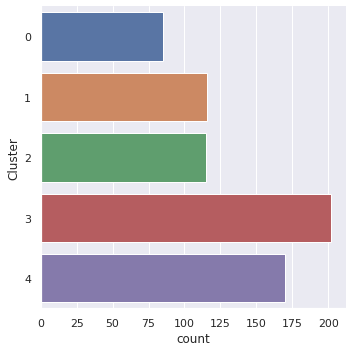

In [ ]:
# Print the Cluster Centers
#X = pd.DataFrame(songdf[["artist_popularity", "danceability", "energy", "loudness", "valence", "acousticness","popularity"]]) 
print("Features ", " artist_popularity", "\tdanceability", "\tenergy", "\t\tloudness", "\tvalence", "\tacoustincness", "\tpopularity")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

### There is an even distirbution of data points in each of these clusters

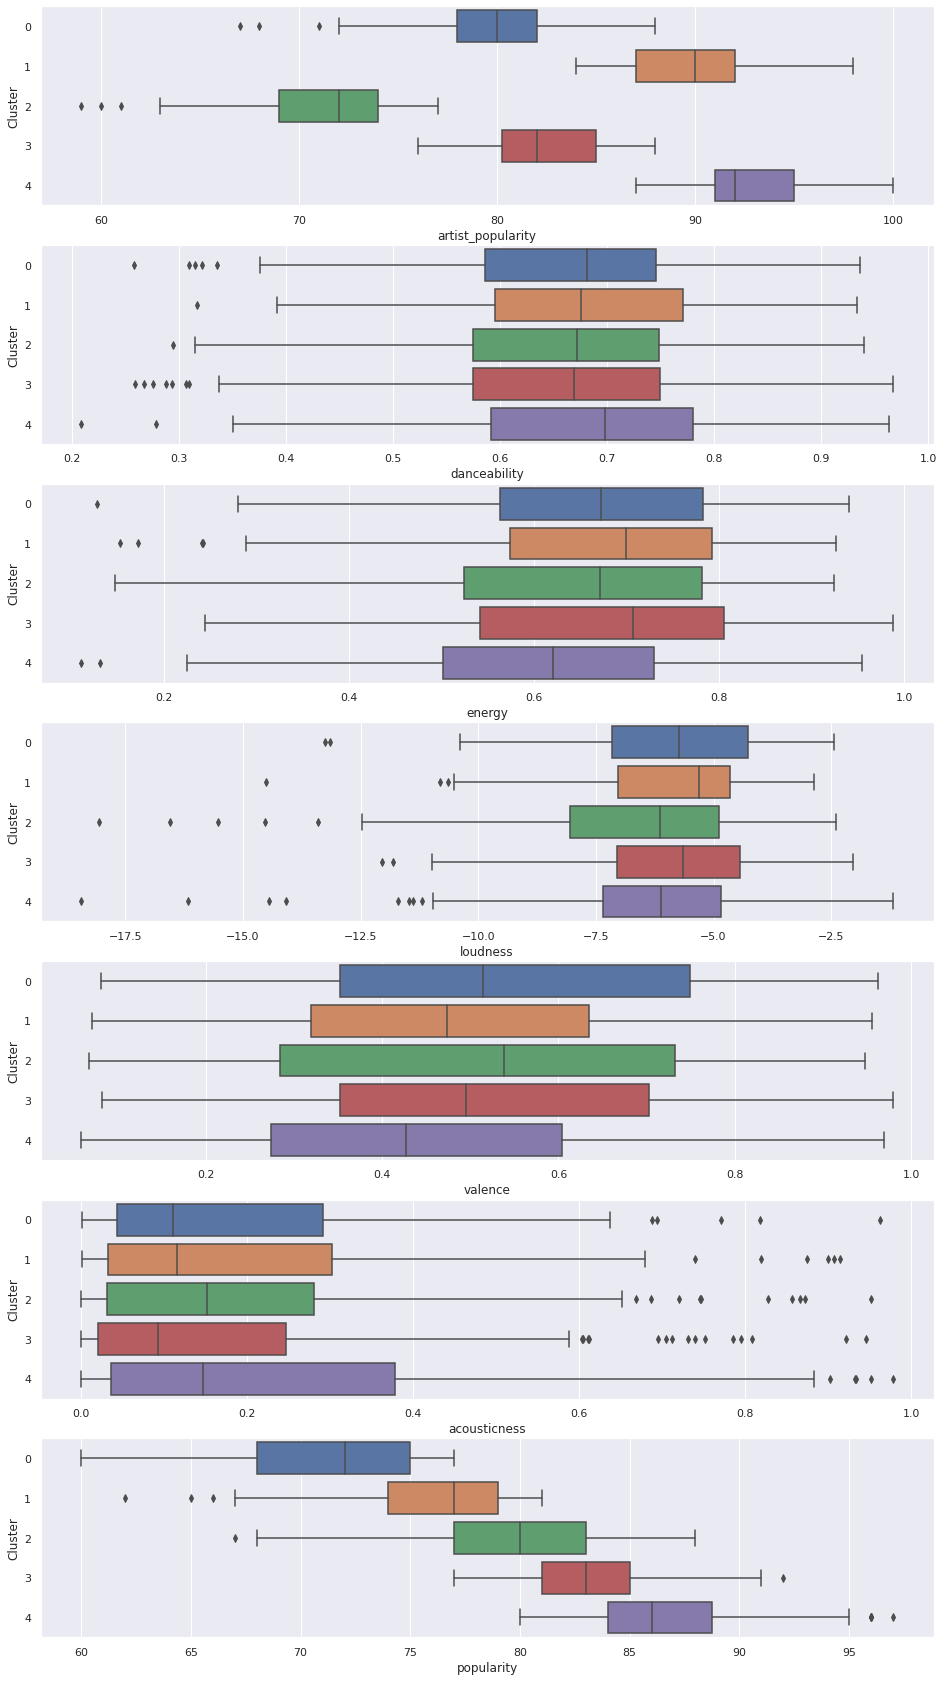

In [ ]:
# Boxplots for all Features against the Clusters
#print("Features ", " artist_popularity", "\tdanceability", "\tenergy", "\t\tloudness", "\tvalence", "\tacoustincness", "\tpopularity")
f, axes = plt.subplots(7, 1, figsize=(16,30))
sb.boxplot(x = 'artist_popularity', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'danceability', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'energy', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'loudness', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'valence', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'acousticness', y = 'Cluster', data = X_labeled, ax = axes[5])
sb.boxplot(x = 'popularity', y = 'Cluster', data = X_labeled, ax = axes[6])

### **Insight 1**: Songs with higher popularity (purple box plot) tend to have `higher artist popularity`. This coincides with the results we have obtained for the decision trees and random forest

### **Insight 2**: Songs with higher popularity also tend to have `slightly higher danceability`, with the median danceability higher for the purple box plot as compared to the rest. This could mean that one can increase the danceability of a song to make it slightly more popular

### **Insight 3**: Songs with higher popularity also had slightly higher acoustinceness value, with a higher median, as compared to the rest.

### **Insight 4**: Songs with low popularity (blue box plot) had lower values of acousticness, with the blue box plot having a lower median, as compared to the rest

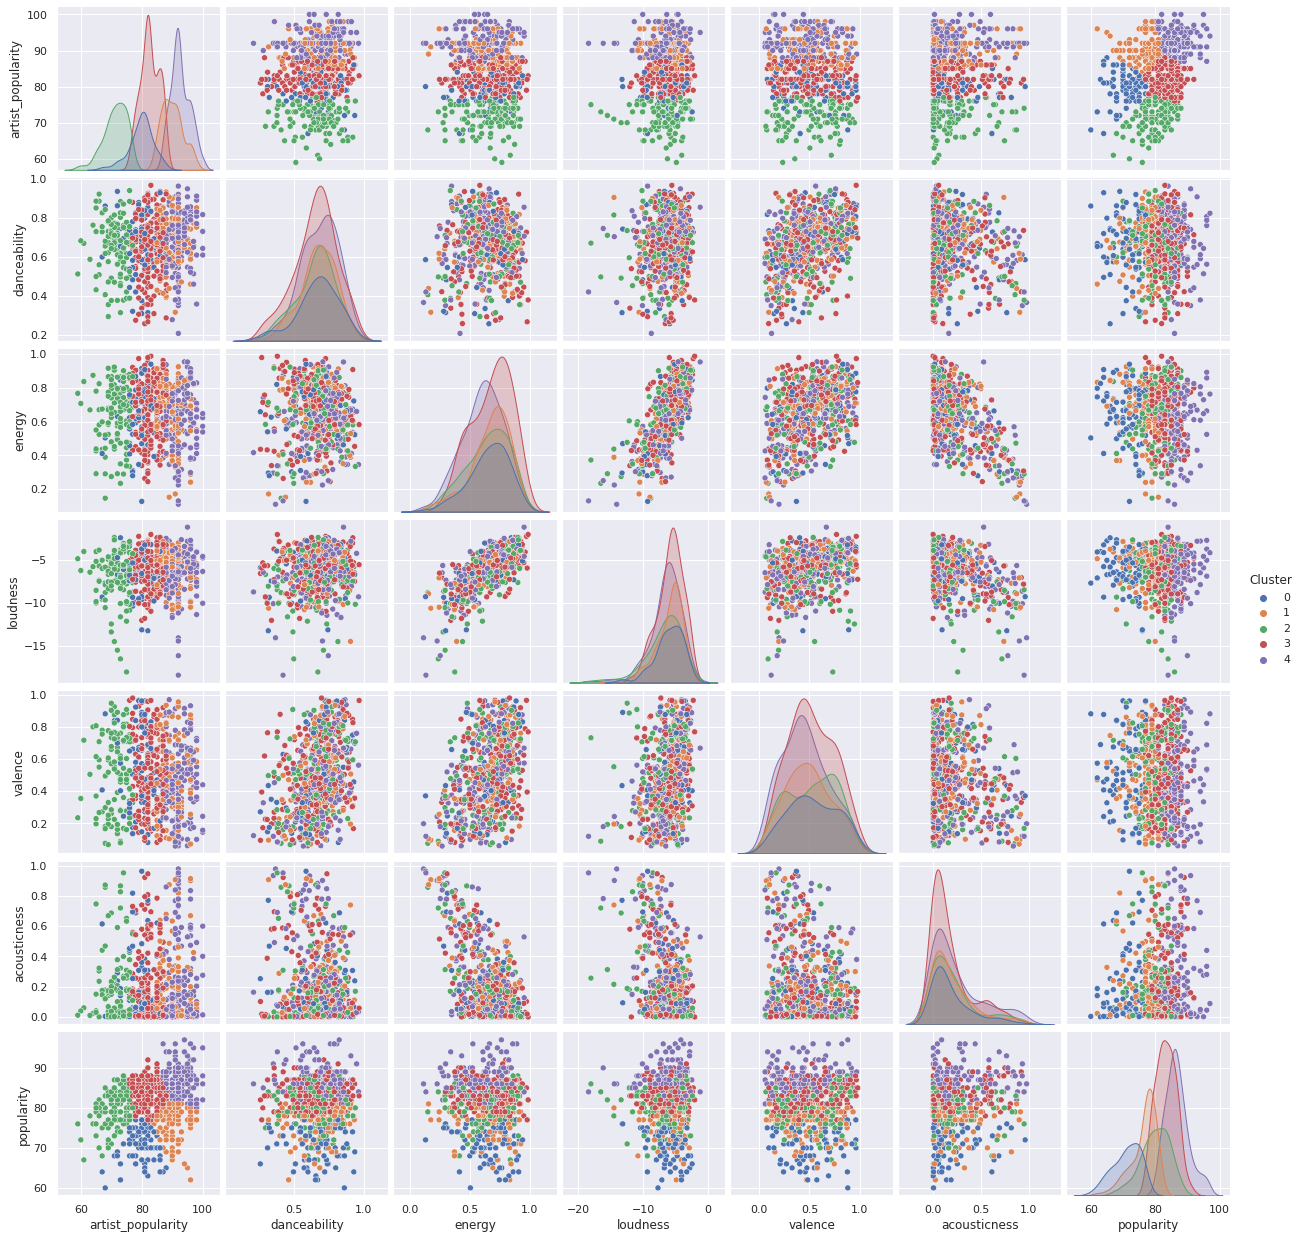

In [ ]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

### Althought only 2D visualisation was made, the clusters are seen to have distinctly different features, as seen by the varying plots, which allowed for a comparison to be made between clusters